In [1]:
import numpy as np
import pandas as pd
from inc_shape import IncrementalDepth
from prog_shape import ProgressiveDepth
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv("./data/sample_data2.csv", index_col=0)
print(df.shape)
df.head()

(25, 600)


,C_0,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,...,C_590,C_591,C_592,C_593,C_594,C_595,C_596,C_597,C_598,C_599
0,12.305,12.305,12.305,12.305,0.982,1.496,1.044,0.938,1.500,0.993,...,12.403,0.943,1.504,1.255,1.076,3.325,1.818,1.044,3.330,2.510
1,12.272,12.305,12.305,12.239,0.982,1.491,1.044,0.938,1.496,0.993,...,12.403,0.943,1.504,1.255,1.076,3.309,1.816,1.044,3.309,2.510
2,12.288,12.305,12.321,12.305,0.978,1.496,1.044,0.943,1.504,0.997,...,12.403,0.943,1.504,1.255,1.076,3.292,1.813,1.044,3.298,2.505
3,12.223,12.305,12.288,12.305,0.982,1.504,1.044,0.938,1.496,1.001,...,12.403,0.943,1.504,1.255,1.076,3.314,1.799,1.044,3.303,2.505
4,12.305,12.305,12.305,12.305,0.974,1.496,1.044,0.943,1.496,1.001,...,12.403,0.943,1.504,1.255,1.076,3.309,1.816,1.044,3.303,2.510


<Figure size 2500x500 with 0 Axes>

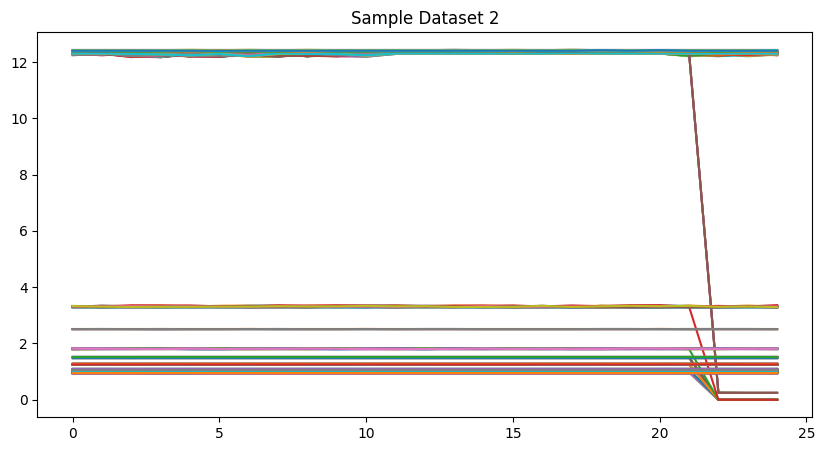

In [3]:
plt.figure(figsize=(25,5))
df.iloc[:,:-1].plot(legend=None, figsize=(10,5))
plt.title("Sample Dataset 2")
plt.show()

599
{'not outlier', 'outlier'}


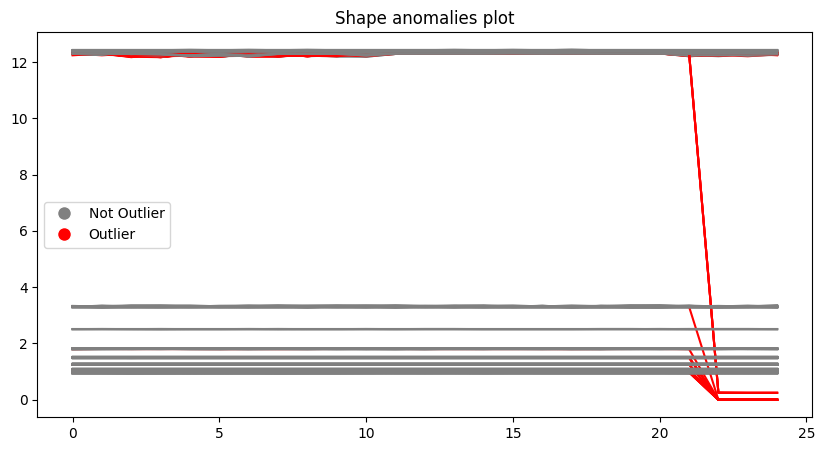

In [4]:
F = df.iloc[:,:-1].T.to_numpy()
prog_shape1 = ProgressiveDepth(F=F, p=0.9, k=1.5)
prog_shape1.getAmplitudeOutliers(F)
print(len(prog_shape1.labels))
print(set(prog_shape1.labels))

colors = {'not outlier': 'gray', 'outlier': 'red'}
cmap = ListedColormap([colors[label] for label in prog_shape1.labels])

legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Not Outlier', markerfacecolor='gray', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Outlier', markerfacecolor='red', markersize=10)
]
df.iloc[:,:-1].plot(colormap=cmap, figsize=(10, 5))
plt.title("Shape anomalies plot")
plt.legend(handles=legend_handles)

(25, 599)
number of labels: 599


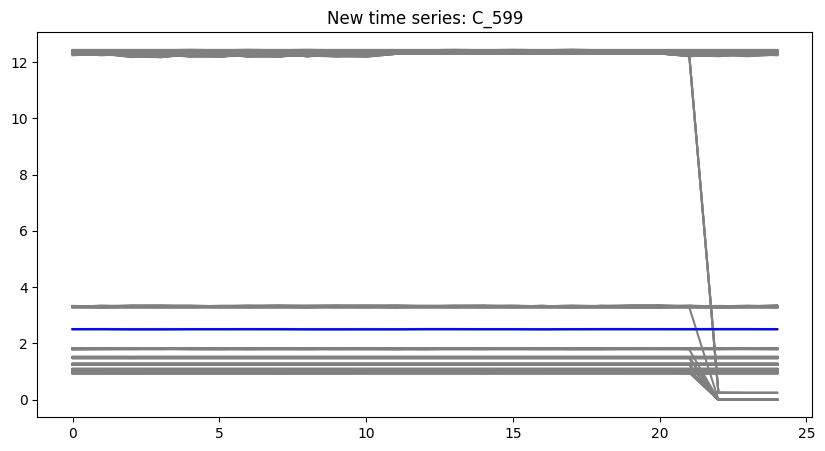

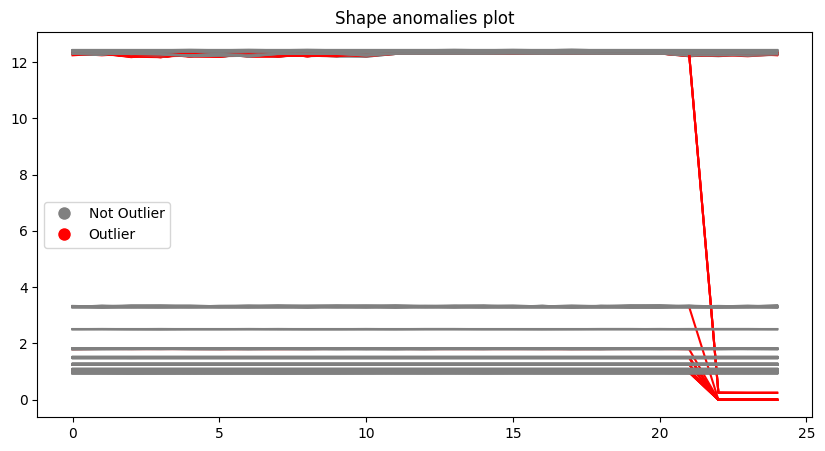

In [5]:
print(df.iloc[:,:-1].shape)
print('number of labels:',len(prog_shape1.labels))
F_new = [df.iloc[:,df.shape[1]-1].T.to_numpy()] # new time series
ax = df.plot(figsize=(10, 5), color='gray', legend=False)
df.iloc[:, df.shape[1]-1].plot(ax=ax, color='blue')
plt.title(f"New time series: C_{df.shape[1]-1}")

prog_shape1.getAmplitudeOutliers(F_new)
cmap = ListedColormap([colors[label] for label in prog_shape1.labels])
df.plot(colormap=cmap, figsize=(10, 5))
plt.title("Shape anomalies plot")
plt.legend(handles=legend_handles)

(600, 15)


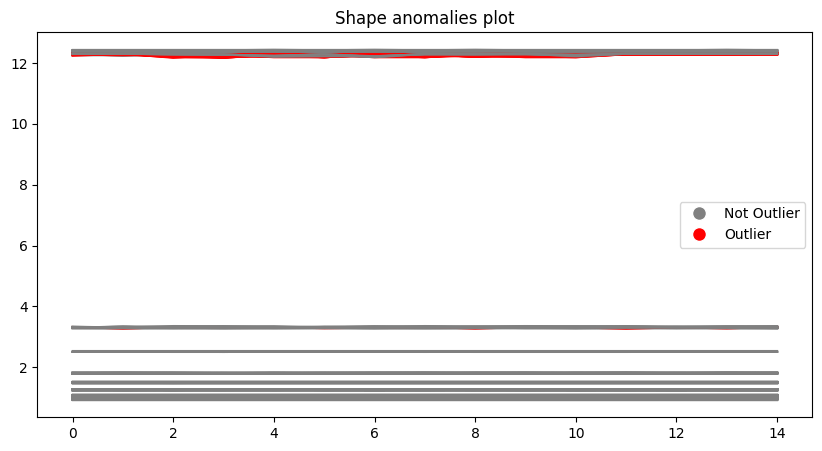

In [6]:
F = df.iloc[:-10,:].T.to_numpy() 
print(F.shape)
inc_shape1 = IncrementalDepth(F=F, p=0.9, k=1.5, threshold=10)
inc_shape1.getAmplitudeOutliers(F)
cmap = ListedColormap([colors[label] for label in inc_shape1.labels])
df.iloc[:-10,:].plot(colormap=cmap, figsize=(10, 5))
plt.title("Shape anomalies plot")
plt.legend(handles=legend_handles)

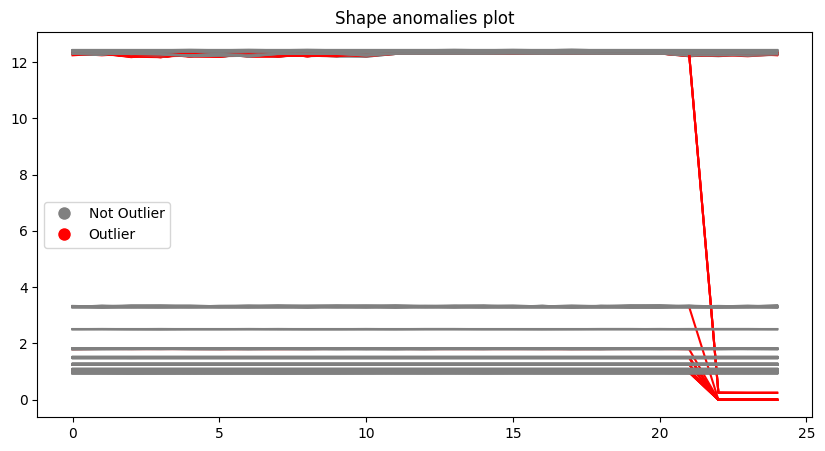

In [8]:
T_new = df.iloc[15:25,:].T.to_numpy() # new time points should recompute depths
inc_shape1.update(T_new)
cmap = ListedColormap([colors[label] for label in inc_shape1.labels])
df.plot(colormap=cmap, figsize=(10, 5))
plt.title("Shape anomalies plot")
plt.legend(handles=legend_handles)